In [45]:
import pandas as pd
beer_consumption = pd.read_csv('Consumo_cerveja.csv', delimiter=',')
beer_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


- Data: Date
- Temperatura Media (C): nhiet do trung binh
- Temperatura Minima (C): nhiet do thap nhat
- Temperatura Maxima (C): nhiet do cao nhat
- Precipitacao (mm): luong mua (rain fall)
- Final de Semana: weekend or not (0 = not weekend, 1 = weekend)
- Consumo de cerveja (litros): luong bia tieu thu

In [ ]:
#Tim va toi uu hoa mo hinh multiple linear regression cho luong bia tieu thu?
#check xem mo hinh du bao nhu the nao?

In [46]:
beer_consumption.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [47]:
beer_consumption.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [48]:
beer_consumption.rename(columns = {'Data':'date', 'Temperatura Media (C)':'temp_mean', 'Temperatura Minima (C)': 'temp_min', 
                                   'Temperatura Maxima (C)':'temp_max', 'Precipitacao (mm)': 'rain_amount', 'Final de Semana':'weekend', 
                                   'Consumo de cerveja (litros)': 'beer_consumption'}, inplace = True)
beer_consumption.head()

,date,temp_mean,temp_min,temp_max,rain_amount,weekend,beer_consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [53]:
beer_consumption.drop(columns='date',inplace=True)

In [67]:
beer_consumption = beer_consumption.replace(',','.',regex=True)

In [70]:
beer_consumption = beer_consumption.astype('float64')

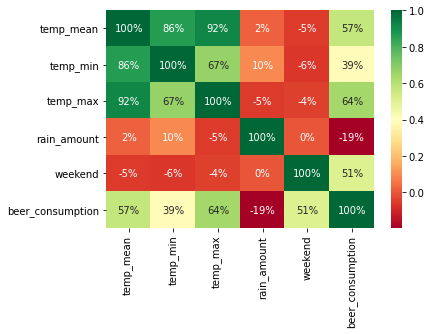

In [74]:
import seaborn as sns
sns.heatmap(beer_consumption.corr(),annot=True,fmt=".0%",cmap="RdYlGn");

In [75]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='beer_consumption ~ temp_mean + temp_min + temp_max + rain_amount + weekend',
             data=beer_consumption).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       beer_consumption   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.19e-97
Time:                        11:22:38   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.4447      0.845      7.627      

In [1]:
#adj R sqr = 0.719  ->  72% beer_consumption duoc giai thich boi mo hinh
#pvalue temp_mean va temp_min > sig_level = 0.05 -> ko co quan he tuyen tinh
#Prob(F statistc) = 0.00 -> co tac dong cua cac predictors den beer_consumption
#coef weekend 5.18 -> cuoi tuan luong bia tieu thu nhieu hon 5.18l so voi ngay thuong
#nhiet do cao hon 1oC thi luong bia thang them 0.67l
#luong mua tang them 1don vi thi luong bia giam 0.05l

In [78]:
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
y,X=dmatrices('beer_consumption ~ temp_max + rain_amount + weekend',
              beer_consumption,return_type="dataframe")
model = LinearRegression()
model = model.fit(X,y)
Y_Pred = model.predict(X)
Y_Pred[:5]

array([[28.15972214],
       [28.82826482],
       [31.60559388],
       [30.66750143],
       [25.35184291]])

In [79]:
y[:5]

,beer_consumption
0,25.461
1,28.972
2,30.814
3,29.799
4,28.900


C:\Users\tocba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


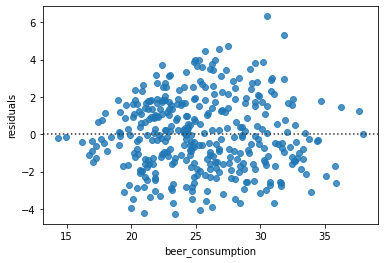

In [80]:
import matplotlib.pyplot as plt
ax12=sns.residplot(y,Y_Pred)
ax12.set_ylabel('residuals')
plt.show()

In [81]:
#luong bia tieu thu trong khoang 20-30 thi mo hinh du doan sai nhieu
#duoi 20 va tren 30 mo hinh du doan kha chinh xac

In [82]:
residuals = Y_Pred - y
residuals=residuals.rename(columns={'beer_consumption':'residuals'})
residuals.head()

,residuals
0,2.698722
1,-0.143735
2,0.791594
3,0.868501
4,-3.548157


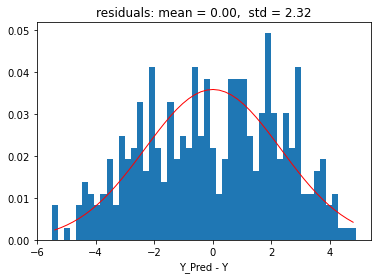

In [87]:
import scipy.stats as stats
#plotting residual distribution 
# Bin
n, bin_edges = np.histogram(residuals, 50)
# Normalize it, so that every bins value gives the probability of that bin
bin_probability = n/float(n.sum())
# Get the mid points of every bin
bin_middles = (bin_edges[1:]+bin_edges[:-1])/2.
# Compute the bin-width
bin_width = bin_edges[1]-bin_edges[0]
# Plot the histogram of residuals
plt.bar(bin_middles, bin_probability, width=bin_width)


# Fit to normal distribution
(mu, sigma) = stats.norm.fit(residuals)
std = residuals.std()
#plotting normal curve  
y_norm = stats.norm.pdf(bin_middles, mu, sigma)*bin_width
l = plt.plot(bin_middles, y_norm, 'r', linewidth=1)
plt.title( "residuals: mean = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Y_Pred - Y')
plt.show()

In [ ]:
#ideal adj R sqr >= 0.8 -> mo hinh du bao chua tot